In [67]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from collections import OrderedDict
import io

In [75]:
# Dataset of 40,000 observations, with 20,0000 from 
df = pd.read_csv('EDA_sample.csv')

In [76]:
fp = df[df['loan_status'] == 'Fully Paid']
cf = df[df['loan_status'] == 'Charged Off']

In [77]:
# Code to download CSV's

# import csv
# with open("EDA_sample.csv","w") as out:
#     out.write(EDA_sample.to_csv())

In [168]:
dfe.columns

Index(['Unnamed: 0', 'loan_amnt', 'funded_amnt', 'term', 'int_rate',
       'installment', 'sub_grade', 'emp_length', 'home_ownership',
       'annual_inc', 'verification_status', 'loan_status', 'purpose',
       'zip_code', 'addr_state', 'dti', 'delinq_2yrs', 'inq_last_6mths',
       'open_acc', 'pub_rec', 'revol_bal', 'revol_util', 'total_acc',
       'total_pymnt', 'total_rec_prncp', 'total_rec_int', 'recoveries',
       'collection_recovery_fee', 'collections_12_mths_ex_med',
       'application_type', 'acc_now_delinq', 'tot_coll_amt', 'tot_cur_bal',
       'open_acc_6m', 'open_act_il', 'open_il_12m', 'open_il_24m',
       'mths_since_rcnt_il', 'total_bal_il', 'il_util', 'open_rv_12m',
       'open_rv_24m', 'max_bal_bc', 'all_util', 'total_rev_hi_lim', 'inq_fi',
       'total_cu_tl', 'inq_last_12m', 'acc_open_past_24mths', 'avg_cur_bal',
       'bc_open_to_buy', 'bc_util', 'chargeoff_within_12_mths', 'delinq_amnt',
       'mort_acc', 'num_accts_ever_120_pd', 'num_actv_bc_tl',
     

In [125]:
dfe = df.copy()

dfe['int_rate'] = dfe['int_rate'].apply(lambda x: x.strip('%'))

In [165]:
mean_dti = np.mean(dfe['dti'])
dfe['dti'] = dfe['dti'].fillna(mean_dti)
# Column of incomes under 200000
dfe['income_200'] = dfe['annual_inc'][dfe['annual_inc'] < 200000]
# Column of dti's under 100
dfe['dti_100'] = dfe['dti'][dfe['dti'] < 100]

In [166]:
dfe.columns.get_loc('dti_100')

80

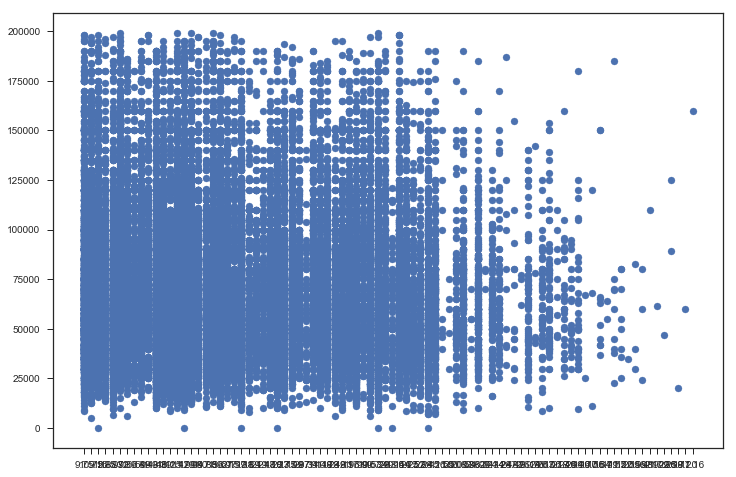

In [163]:
f = plt.figure(figsize=(12,8))
plt.scatter(x=dfe.iloc[:,79], y=dfe.iloc[:,4])
plt.show()

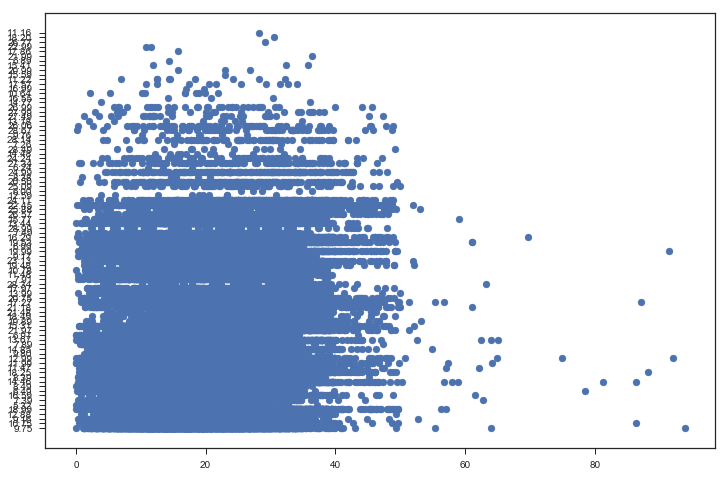

In [167]:
f = plt.figure(figsize=(12,8))
plt.scatter(x=dfe.iloc[:,80], y=dfe.iloc[:,4])
plt.show()

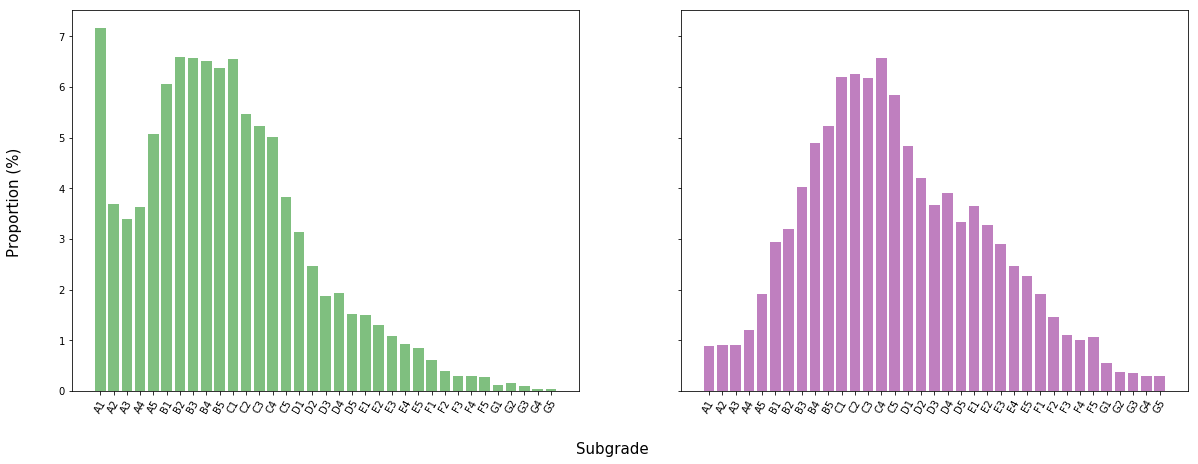

In [79]:
# Subgrade distribution
fpsg = fp.iloc[:,6]
cfsg = cf.iloc[:,6]

# Fully Paid Subgrade Counts
dict_fpsg = fpsg.value_counts()
keys_fpsg = sorted(dict_fpsg.keys())
dict_fpsg = OrderedDict((key,dict_fpsg[key]) for key in keys_fpsg)
dict_fpsg.update((x, y/200) for x, y in dict_fpsg.items())

# Charged Off Subgrade Counts
dict_cfsg = cfsg.value_counts()
keys_cfsg = sorted(dict_cfsg.keys())
dict_cfsg = OrderedDict((key,dict_cfsg[key]) for key in keys_cfsg)
dict_cfsg.update((x, y/200) for x, y in dict_cfsg.items())

# Plot
f, sp = plt.subplots(1, 2, sharex=True, sharey=True, figsize=(20,7))

sp[0].bar(dict_fpsg.keys(), dict_fpsg.values(), color = 'g', alpha = 0.5)
sp[1].bar(dict_cfsg.keys(), dict_cfsg.values(), color = 'purple', alpha=0.5)
    
for tick in sp[0].get_xticklabels():
    tick.set_rotation(60)
for tick in sp[1].get_xticklabels():
    tick.set_rotation(60)
    
f.text(0.5, 0, 'Subgrade', ha='center',size=15)
f.text(0.08, 0.5, 'Proportion (%)', va='center', rotation='vertical',size=15)

plt.show()

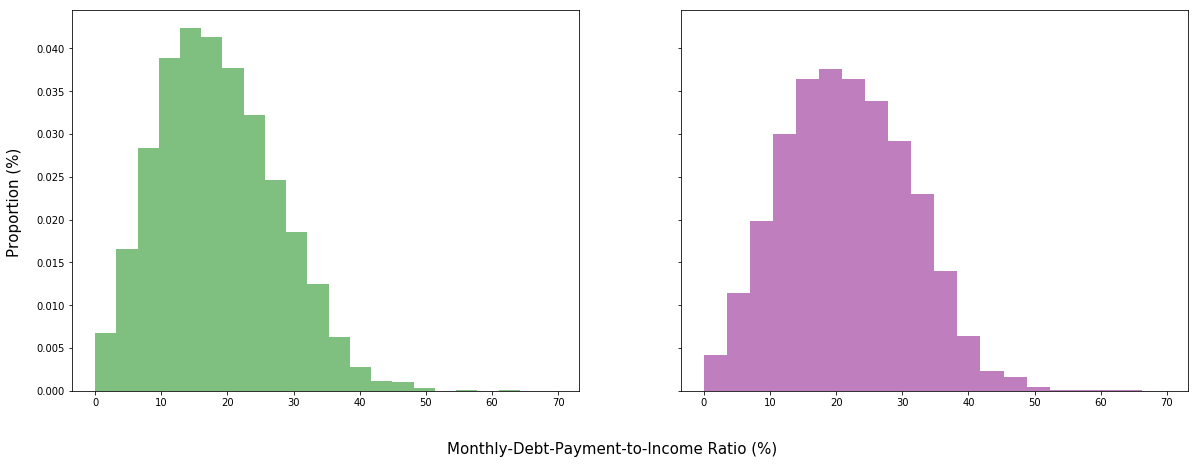

In [59]:
# Extract DTI ratios below 70 for plotting (i.e. the vast majority)
fpdti = fp.iloc[:]['dti'].dropna()
fpdti = fpdti[fpdti<70]
cfdti = cf.iloc[:]['dti'].dropna()
cfdti = cfdti[cfdti<70]

# Plot
f, sp = plt.subplots(1, 2, sharex=True, sharey=True, figsize=(20,7))

sp[0].hist(fpdti, color = 'g', alpha = 0.5,bins=20,density=True)
sp[1].hist(cfdti, color = 'purple', alpha=0.5,bins=20,density=True)
    
f.text(0.5, 0, 'Monthly-Debt-Payment-to-Income Ratio (%)', ha='center',size=15)
f.text(0.08, 0.5, 'Proportion (%)', va='center', rotation='vertical',size=15)

plt.show()

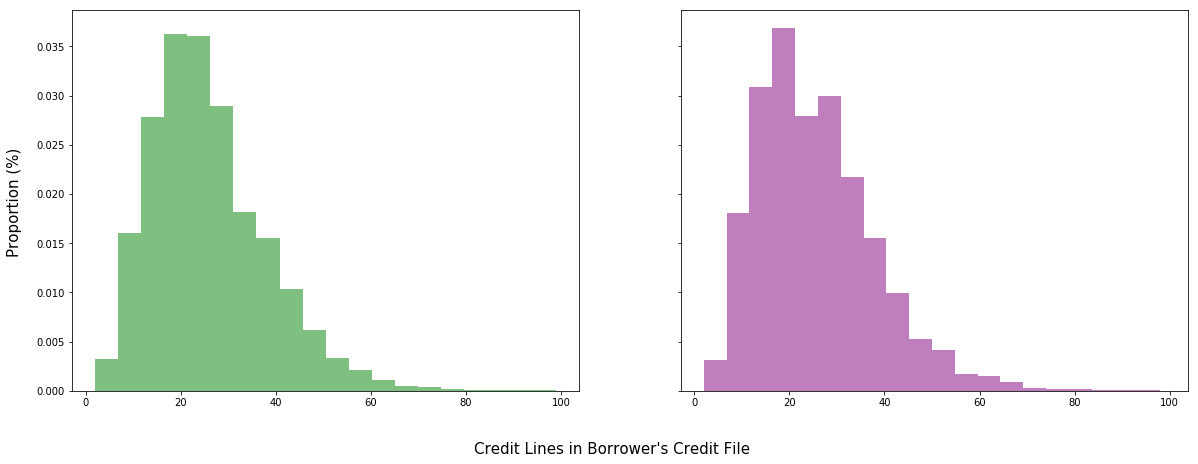

In [60]:
# Extract total number of credit lines currently in the borrower's credit file
fpta = fp.iloc[:]['total_acc'].dropna()
fpta = fpta[fpta<100]
cfta = cf.iloc[:]['total_acc'].dropna()
cfta = cfta[cfta<100]

# Plot
f, sp = plt.subplots(1, 2, sharex=True, sharey=True, figsize=(20,7))

sp[0].hist(fpta, color = 'g', alpha = 0.5,bins=20,density=True)
sp[1].hist(cfta, color = 'purple', alpha=0.5,bins=20,density=True)
    
f.text(0.5, 0, "Credit Lines in Borrower's Credit File", ha='center',size=15)
f.text(0.08, 0.5, 'Proportion (%)', va='center', rotation='vertical',size=15)

plt.show()

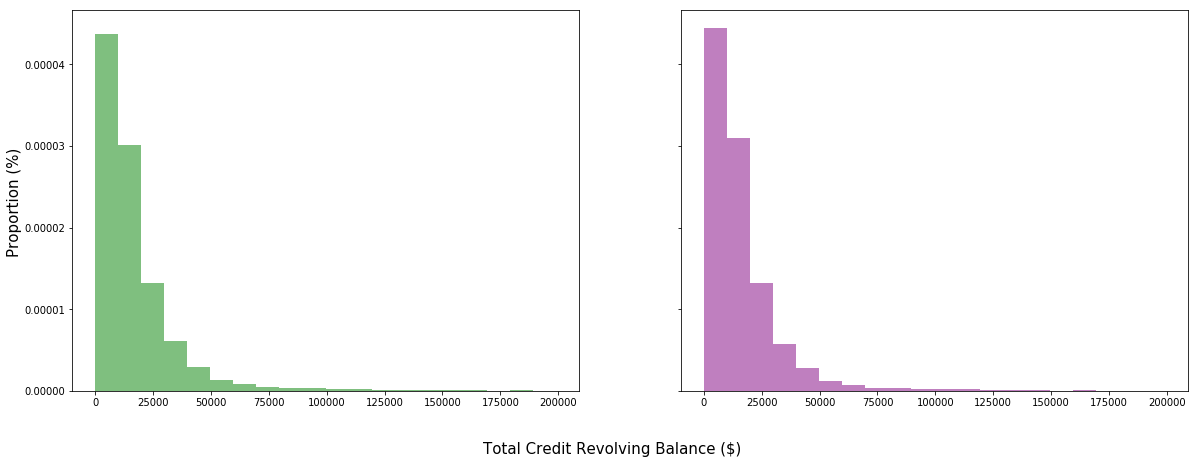

In [64]:
# Total credit revolving balance
fprb = fp.iloc[:]['revol_bal'].dropna()
fprb = fprb[fprb<200000]
cfrb = cf.iloc[:]['revol_bal'].dropna()
cfrb = cfrb[cfrb<200000]

# Plot
f, sp = plt.subplots(1, 2, sharex=True, sharey=True, figsize=(20,7))

sp[0].hist(fprb, color = 'g', alpha = 0.5,bins=20,density=True)
sp[1].hist(cfrb, color = 'purple', alpha=0.5,bins=20,density=True)
    
f.text(0.5, 0, "Total Credit Revolving Balance ($)", ha='center',size=15)
f.text(0.08, 0.5, 'Proportion (%)', va='center', rotation='vertical',size=15)

plt.show()

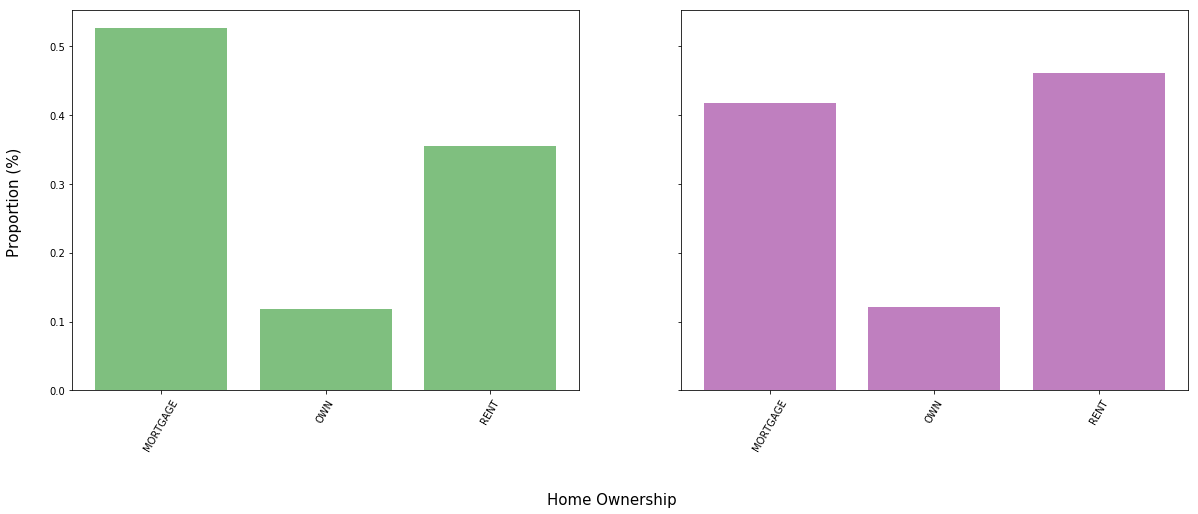

In [50]:
fphome = fp.iloc[:,8]
cfhome = cf.iloc[:,8]

dict_fphome = fphome.value_counts()
keys_fphome = sorted(dict_fphome.keys())
dict_fphome = OrderedDict((key,dict_fphome[key]) for key in keys_fphome)
dict_fphome.update((x, y/20000) for x, y in dict_fphome.items())

dict_cfhome = cfhome.value_counts()
keys_cfhome = sorted(dict_cfhome.keys())
dict_cfhome = OrderedDict((key,dict_cfhome[key]) for key in keys_cfhome)
dict_cfhome.update((x, y/20000) for x, y in dict_cfhome.items())

# Plot
f, sp = plt.subplots(1, 2, sharex=True, sharey=True, figsize=(20,7))

sp[0].bar(dict_fphome.keys(), dict_fphome.values(), color = 'g', alpha = 0.5)
sp[1].bar(dict_cfhome.keys(), dict_cfhome.values(), color = 'purple', alpha=0.5)
    
for tick in sp[0].get_xticklabels():
    tick.set_rotation(60)
for tick in sp[1].get_xticklabels():
    tick.set_rotation(60)
    
f.text(0.5, -0.1, 'Home Ownership', ha='center',size=15)
f.text(0.08, 0.5, 'Proportion (%)', va='center', rotation='vertical',size=15)

plt.show()

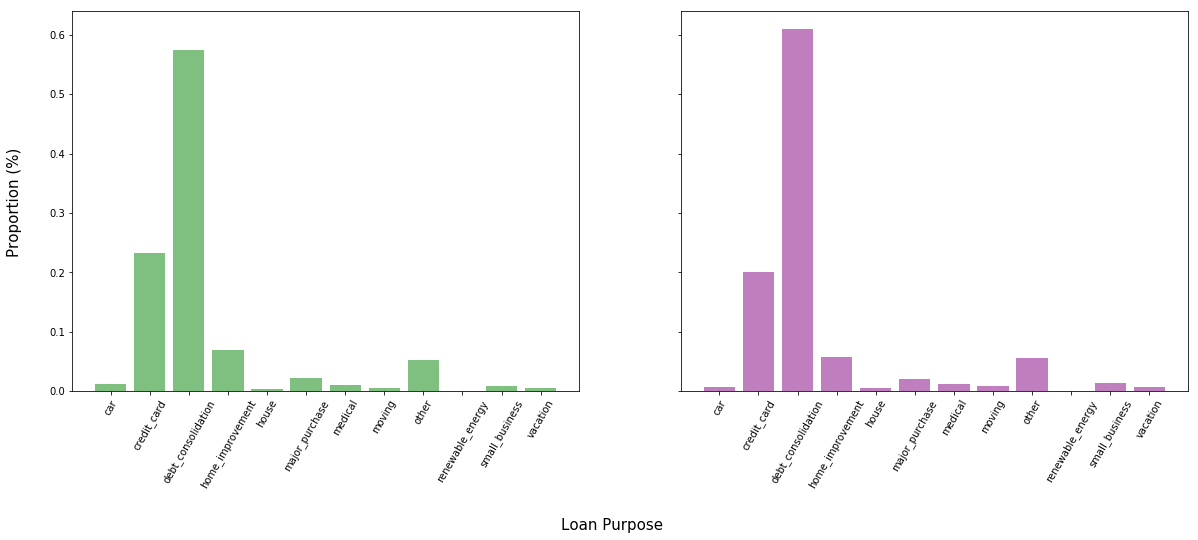

In [51]:
fppurp = fp.iloc[:,12]
cfpurp = cf.iloc[:,12]

dict_fppurp = fppurp.value_counts()
keys_fppurp = sorted(dict_fppurp.keys())
dict_fppurp = OrderedDict((key,dict_fppurp[key]) for key in keys_fppurp)
dict_fppurp.update((x, y/20000) for x, y in dict_fppurp.items())

dict_cfpurp = cfpurp.value_counts()
keys_cfpurp = sorted(dict_cfpurp.keys())
dict_cfpurp = OrderedDict((key,dict_cfpurp[key]) for key in keys_cfpurp)
dict_cfpurp.update((x, y/20000) for x, y in dict_cfpurp.items())

# Plot
f, sp = plt.subplots(1, 2, sharex=True, sharey=True, figsize=(20,7))

sp[0].bar(dict_fppurp.keys(), dict_fppurp.values(), color = 'g', alpha = 0.5)
sp[1].bar(dict_cfpurp.keys(), dict_cfpurp.values(), color = 'purple', alpha=0.5)
    
for tick in sp[0].get_xticklabels():
    tick.set_rotation(60)
for tick in sp[1].get_xticklabels():
    tick.set_rotation(60)
    
f.text(0.5, -0.15, 'Loan Purpose', ha='center',size=15)
f.text(0.08, 0.5, 'Proportion (%)', va='center', rotation='vertical',size=15)

plt.show()

In [65]:
# fp_sample_emp = df.iloc[fully_paid.index,6].sample(20000)
# cf_sample_emp = df.iloc[charged_off.index,6].sample(20000)

# dict_fp_emp = fp_sample_emp.value_counts()
# keys_fp_emp = sorted(dict_fp_emp.keys())
# dict_fp_emp = OrderedDict((key,dict_fp_emp[key]) for key in keys_fp_emp)
# dict_fp_emp.update((x, y/200) for x, y in dict_fp_emp.items())

# # Add the no information key-value pair
# fp_none = 100 - sum(dict_fp_emp.values())
# dict_fp_emp['No Info'] = fp_none

# new_emp_labels = ['No Info','<1','1','2','3','4','5','6','7','8','9','10+']
# old_emp_labels = ['No Info','< 1 year','1 year','2 years','3 years','4 years','5 years','6 years',
#                   '7 years','8 years','9 years','10+ years']

# # Create new, appropriately-ordered dictionary
# new_dict_fp_emp = {}
# for key in range(0,12):
#     new_dict_fp_emp[new_emp_labels[key]] = dict_fp_emp[old_emp_labels[key]]

# dict_cf_emp = cf_sample_emp.value_counts()
# keys_cf_emp = sorted(dict_cf_emp.keys())
# dict_cf_emp = OrderedDict((key,dict_cf_emp[key]) for key in keys_cf_emp)
# dict_cf_emp.update((x, y/200) for x, y in dict_cf_emp.items())

# # Add the no information key-value pair
# cf_none = 100 - sum(dict_cf_emp.values())
# dict_cf_emp['No Info'] = cf_none

# # Create new, appropriately-ordered dictionary
# new_dict_cf_emp = {}
# for key in range(0,12):
#     new_dict_cf_emp[new_emp_labels[key]] = dict_cf_emp[old_emp_labels[key]]

# # Plot
# f, sp = plt.subplots(2, 1, sharex=True, sharey=True, figsize=(15,5))

# sp[0].bar(new_dict_fp_emp.keys(), new_dict_fp_emp.values(), color = 'g', alpha = 0.5,)
# sp[1].bar(new_dict_cf_emp.keys(), new_dict_cf_emp.values(), color = 'r', alpha=0.5)
    
# for tick in sp[1].get_xticklabels():
#     tick.set_rotation(45)
    
# f.text(0.5, -.16, 'Employment Years', ha='center',size=13)
# f.text(0.06, 0.5, 'Proportion (%)', va='center', rotation='vertical',size=13)

# plt.show()

In [66]:
# fp_sample_del = df.iloc[fully_paid.index,15].sample(20000)
# cf_sample_del = df.iloc[charged_off.index,15].sample(20000)

# plt.hist(cf_sample_del, bins = 50)
# plt.hist(fp_sample_del, bins = 50)
# plt.show()

In [184]:
df = pd.read_csv('LC2016Q1_v2.csv')

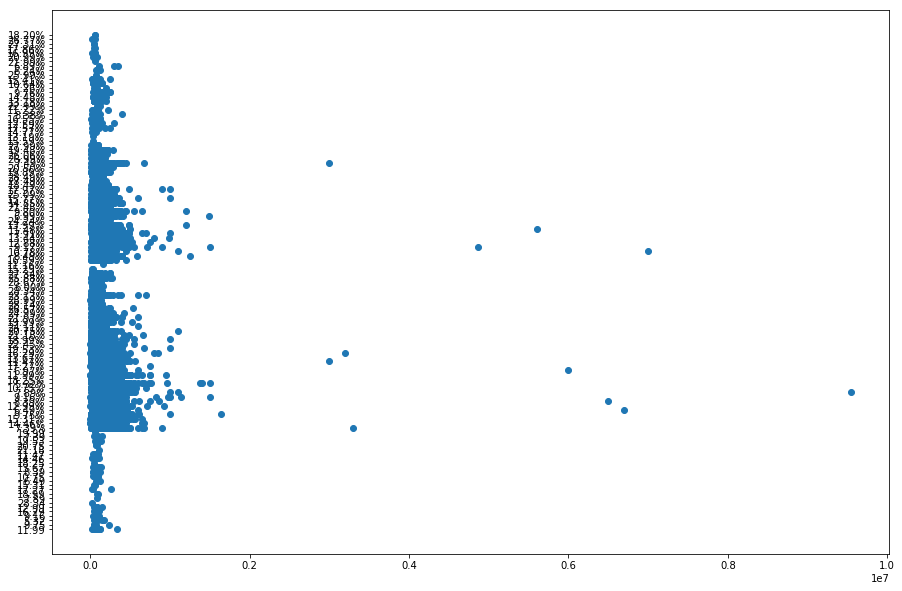

In [191]:
df1 = df.copy()

# for i in range(0, 100):
#     df_1.iloc[i,3] = df_1['int_rate'][i].strip('%')
    
df1['int_rate'] = df1['int_rate'].apply(lambda x: x.strip('%'))

f = plt.figure(figsize=(15,10))
plt.scatter(df_1['annual_inc'],df_1['int_rate'])

In [195]:
sum(df['annual_inc'] > 200000)/82000

0.02371951219512195

In [1]:
# # Income under column 8

# # fp_sample_all = df.iloc[fully_paid.index,].sample(20000)
# # cf_sample_all = df.iloc[charged_off.index,].sample(20000)

# # # Annual income grouped by subgrade for fully paid
# # fp_sample_all.groupby(['sub_grade', 'annual_inc']).mean().iloc[:,1]

# # # Annual income grouped by subgrade for charged off
# # cf_sample_all.groupby(['sub_grade', 'annual_inc']).mean().iloc[:,1].loc['A1']

# from matplotlib.ticker import PercentFormatter

# f, sp = plt.subplots(2, 1, sharex=True, sharey=True, figsize=(15,20))

# # for subgrade in keys_fp_sg:

# incomes = df.groupby(['loan_status', 'annual_inc']).agg({
#     'annual_inc': np.mean
# })

# log_income_cf = np.log(incomes.iloc[:,0].loc['Charged Off']+.01)
# log_income_fp = np.log(incomes.iloc[:,0].loc['Fully Paid']+.01)

# bins_cf = np.arange(np.floor(log_income_cf.min()),np.ceil(log_income_cf.max()))
# bins_fp = np.arange(np.floor(log_income_fp.min()),np.ceil(log_income_fp.max()))


# sp[0].hist(log_income_cf, bins=bins_cf,density=True)
# sp[1].hist(log_income_fp, bins=bins_fp,density=True)